# Leah Vella

In [ ]:
import pandas as pd
import numpy as np
import string
import re
import mpmath
from collections import Counter
import nltk
from nltk.corpus import stopwords
import string
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

import plotly.express as px
import plotly.graph_objects as go
import plotly.colors

## Reading in the initial .csv files provided

In [ ]:
#reading the two datasets
police_press_releases = pd.read_csv('police_press_releases.csv')
local_news_articles = pd.read_csv('local_news_articles.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'police_press_releases.csv'

In [ ]:
vertical_title = pd.concat([police_press_releases['title'], local_news_articles['title']], axis=0)
vertical_date = pd.concat([police_press_releases['date_published'], local_news_articles['publish_date']], axis=0)
vertical_content_details = pd.concat([police_press_releases['content'], local_news_articles['content']], axis=0)
df_vertical_title = pd.DataFrame({'title':vertical_title})
df_vertical_date = pd.DataFrame({'date':vertical_date})
df_vertical_content_details = pd.DataFrame({'content':vertical_content_details})

In [ ]:
data = {'date': vertical_date, 'title': vertical_title,'content': vertical_content_details}
combined_traffic_data = pd.DataFrame(data)

## Wordcloud analysis

In [ ]:
#STEP
# Counting words with Counter
title_list = combined_traffic_data['title'].values.tolist()
sep = " . "  # separator
res = sep.join(title_list)
print(res)

In [ ]:
pip install wordcloud

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud (
    width=800,
    height=400,
    background_color="white",
    collocations=False).generate(res)

In [ ]:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
traffic_data = pd.read_excel('cleaned_data_using_content.xlsx')
#selecting just records assosciated to accidents
accident_data = traffic_data[traffic_data['accident_flag'] == 1]

## Reading in the cleaned .csv

In [ ]:
first_article = min(accident_data['published_date'])
last_article = max(accident_data['published_date'])

In [ ]:
print("The oldest article was published on the  ", first_article, "  and the newest article was published on the  ", last_article)

In [ ]:
#adding in the month that the traffic accident took place
accident_data['month'] = pd.DatetimeIndex(accident_data['date of incident']).month

In [ ]:
#creating a subset to work with for the KMeans
accident_df = accident_data[['source','date of incident','time of incident','weekday of incident','city','latitude','longitude',
                             'month','weather_category','accident_flag','hospital_flag','injury_flag','fatal_flag','severe_flag','minor_flag']].copy()
accident_df.rename(columns={'source':'source','date of incident': 'date','time of incident':'time', 'weekday of incident': 'weekday',
                           'city': 'city','latitude':'latitude','longitude':'longitude','month':'month','weather_category':'weather','accident_flag':'accident','hospital_flag':'hospital',
                            'injury_flag':'injury','fatal_flag':'fatal','severe_flag':'severe',
                           'minor_flag':'minor'}, inplace=True)

In [ ]:
#cleaning up
filtered_df = accident_df[accident_df['city'].notnull()]
filtered_df = filtered_df[accident_df['weekday'].notnull()]
#filling na time with mean
filtered_df['time'].fillna((filtered_df['time'].mean()), inplace=True)
filtered_df.info()

In [ ]:
#creating an arbitrary period where we have the city and the month
#making them to string since this is the only way this will work
filtered_df["period"] = filtered_df["city"].astype(str) + filtered_df["month"].astype(str)

## Adding tags to the data for easier EDA

In [ ]:
#mapping categorical variables
#weekday
filtered_df['weekday'] = filtered_df['weekday'].map({'Monday': 1,'Tuesday': 2,'Wednesday': 3,
                                                     'Thursday': 4,'Friday': 5,'Saturday': 6,
                                                     'Sunday': 7})
#weather category
filtered_df['weather'] = filtered_df['weather'].map({'cloudy': 1,'sunny/clear': 2,'rain/drizzle': 3})
#cities to regions
#Southern Harbour District = 1, Northern Harbour District = 2, South Eastern District = 3, Western Dustrict = 4, Northern District = 5, Gozo & COmino District = 6
filtered_df['regions'] = filtered_df['city'].map({'Naxxar': 5,'Marsa': 1,'Saint Paul’s Bay': 5,'Birkirkara': 2,
	'Żebbuġ': 4,'Sliema': 2,'Żejtun': 3,'Attard': 4, 'Paola': 1,'Żabbar': 1,'Floriana': 1,'San Ġwann': 2,'Mellieħa': 5,
	'Rabat': 4,'Fgura': 1,'Imsida': 2,'Santa Venera': 2,'Luqa': 1,'Siġġiewi': 4,'Gżira': 2,'Valletta': 1,'Marsaskala': 3,
	'Pembroke': 2,'Victoria': 6,'Gudja': 3,'Qormi': 2,'Lija': 4,'Xewkija': 6,'Birżebbuġa': 3,'Mosta': 5,'Mġarr': 5,
	'Ħamrun': 2,'Żurrieq': 3,'Pietà': 2,'Għajnsielem': 6,'Tarxien': 1,'Marsaxlokk': 3,'Għaxaq': 3,'Imtarfa': 4,'Iklin': 4,
	'Qala': 6,'Xagħra': 6,'Swieqi': 2,'Kirkop': 3,'Buġibba': 5,'Senglea': 1,'Sannat': 6,'Cospicua': 1,'Balzan': 4,'Ta’ Xbiex': 2,
	'Għarb': 6,'Vittoriosa': 6,'Nadur': 6,'Qrendi': 3,'Imqabba': 3})

In [ ]:
day = Counter(filtered_df['weekday'])
day

In [ ]:
w_cat = Counter(filtered_df['weather'])
w_cat

In [ ]:
cities = Counter(filtered_df['city'])
cities

In [ ]:
regions = Counter(filtered_df['regions'])
regions

In [ ]:
months = Counter(filtered_df['month'])
months

In [ ]:
time = Counter(filtered_df['time'])
time

In [ ]:
source = Counter(filtered_df['source'])
source

# Jamal Muhsen

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.decomposition import PCA

###**Choose Variables + Clean Data**

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
data_path = "/content/drive/MyDrive/ICS5110 Project/Final Code & Report/cleaned_data_using_content_v2.csv"
data_df = pd.read_csv(data_path)

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
data_df.columns

Index(['source', 'published_date', 'title', 'content', 'hospital flag',
       'date of incident', 'weekday of incident', 'time of incident',
       'weekday_mentioned', 'time_ampm', 'city_id', 'city', 'found_in',
       'longitude', 'latitude', 'population', 'date_str',
       'weather_weather_code', 'weather_temperature_2m_max',
       'weather_temperature_2m_min', 'weather_temperature_2m_mean',
       'weather_precipitation_sum', 'weather_precipitation_hours',
       'weather_rain_sum', 'weather_wind_speed_10m_max', 'weather_category',
       'weather_type_category_code', 'accident_flag', 'hospital_flag',
       'fatal_flag', 'injury_flag', 'severe_flag', 'minor_flag',
       'motorcycle_flag', 'bike_flag', 'car_flag', 'gender_M_flag',
       'gender_F_flag', 'heavy_vehicle_flag', 'pedestrian_flag',
       'illegal_flag', 'traffic_flag', 'control_flag', 'vehicle_count'],
      dtype='object')

In [5]:
# Add one column for each weekday
data_df = pd.concat([data_df, pd.get_dummies(data_df["weekday of incident"], dtype=int)], axis=1)

# Drope Variables that are not needed, can not be used or create unnecessary noise
data_df = data_df.drop(columns=["source", "published_date", "title", "content", "weekday_mentioned", "time_ampm", "found_in", "longitude", "latitude", "date_str", "weather_weather_code", "weather_temperature_2m_max", "weather_temperature_2m_min", "weather_precipitation_hours", "weather_rain_sum", "weather_category", "city", "weather_type_category_code", "hospital flag", "date of incident", "accident_flag", "hospital_flag", "injury_flag", "severe_flag", "minor_flag", "city_id", "weekday of incident"])

data_df.head(10)

,time of incident,population,weather_temperature_2m_mean,weather_precipitation_sum,weather_wind_speed_10m_max,fatal_flag,motorcycle_flag,bike_flag,car_flag,gender_M_flag,gender_F_flag,heavy_vehicle_flag,pedestrian_flag,illegal_flag,traffic_flag,control_flag,vehicle_count,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,930.0,10823.0,20.405668,0.0,9.822790,0,1,0,1,1,1,0,0,0,1,0,2,0,0,0,0,1,0,0
1,1830.0,2997.0,25.332254,0.0,9.418661,0,1,0,1,1,0,0,0,0,1,0,2,0,0,0,0,1,0,0
2,800.0,93897.0,20.070833,0.0,20.118975,0,1,0,1,1,0,0,0,0,1,0,2,0,1,0,0,0,0,0
3,1800.0,4722.0,25.393417,0.0,31.644184,0,1,0,1,1,0,0,0,0,1,0,2,0,0,0,0,0,1,0
4,2045.0,11497.0,14.405502,0.4,18.571430,0,1,0,1,1,0,0,0,0,1,0,2,0,0,0,1,0,0,0
5,850.0,4401.0,19.889584,0.5,36.214012,0,1,0,1,1,0,1,0,0,1,0,3,0,0,0,0,0,1,0
6,1030.0,3070.0,28.827085,0.0,19.896310,1,1,0,1,1,1,1,0,0,1,0,3,0,0,0,0,0,0,1
7,815.0,11508.0,26.589584,0.0,17.589418,0,1,0,1,1,1,0,0,0,1,0,2,0,0,0,1,0,0,0
8,1545.0,14890.0,26.389582,0.0,8.891344,0,1,0,1,1,0,0,0,0,1,0,2,0,0,1,0,0,0,0
9,915.0,15404.0,14.308333,0.2,13.183080,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0


In [6]:
# Replace missing time with median
median_time = data_df["time of incident"].median()
data_df["time of incident"] = data_df["time of incident"].fillna(median_time)

# Replace missing population with median
median_population = data_df["population"].median()
data_df["population"] = data_df["population"].fillna(median_population)

# Replace missing temperature with median
median_temp = data_df["weather_temperature_2m_mean"].median()
data_df["weather_temperature_2m_mean"] = data_df["weather_temperature_2m_mean"].fillna(median_temp)

# Replace missing precipitation sum with median
median_precip = data_df["weather_precipitation_sum"].median()
data_df["weather_precipitation_sum"] = data_df["weather_precipitation_sum"].fillna(median_precip)

# Replace missing wind max speed with median
median_wind = data_df["weather_wind_speed_10m_max"].median()
data_df["weather_wind_speed_10m_max"] = data_df["weather_wind_speed_10m_max"].fillna(median_wind)

#Check if any missing values left
print("Missing values: ", data_df.isna().sum())

data_df.head(10)

Missing values:  time of incident               0
population                     0
weather_temperature_2m_mean    0
weather_precipitation_sum      0
weather_wind_speed_10m_max     0
fatal_flag                     0
motorcycle_flag                0
bike_flag                      0
car_flag                       0
gender_M_flag                  0
gender_F_flag                  0
heavy_vehicle_flag             0
pedestrian_flag                0
illegal_flag                   0
traffic_flag                   0
control_flag                   0
vehicle_count                  0
Friday                         0
Monday                         0
Saturday                       0
Sunday                         0
Thursday                       0
Tuesday                        0
Wednesday                      0
dtype: int64


,time of incident,population,weather_temperature_2m_mean,weather_precipitation_sum,weather_wind_speed_10m_max,fatal_flag,motorcycle_flag,bike_flag,car_flag,gender_M_flag,gender_F_flag,heavy_vehicle_flag,pedestrian_flag,illegal_flag,traffic_flag,control_flag,vehicle_count,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,930.0,10823.0,20.405668,0.0,9.822790,0,1,0,1,1,1,0,0,0,1,0,2,0,0,0,0,1,0,0
1,1830.0,2997.0,25.332254,0.0,9.418661,0,1,0,1,1,0,0,0,0,1,0,2,0,0,0,0,1,0,0
2,800.0,93897.0,20.070833,0.0,20.118975,0,1,0,1,1,0,0,0,0,1,0,2,0,1,0,0,0,0,0
3,1800.0,4722.0,25.393417,0.0,31.644184,0,1,0,1,1,0,0,0,0,1,0,2,0,0,0,0,0,1,0
4,2045.0,11497.0,14.405502,0.4,18.571430,0,1,0,1,1,0,0,0,0,1,0,2,0,0,0,1,0,0,0
5,850.0,4401.0,19.889584,0.5,36.214012,0,1,0,1,1,0,1,0,0,1,0,3,0,0,0,0,0,1,0
6,1030.0,3070.0,28.827085,0.0,19.896310,1,1,0,1,1,1,1,0,0,1,0,3,0,0,0,0,0,0,1
7,815.0,11508.0,26.589584,0.0,17.589418,0,1,0,1,1,1,0,0,0,1,0,2,0,0,0,1,0,0,0
8,1545.0,14890.0,26.389582,0.0,8.891344,0,1,0,1,1,0,0,0,0,1,0,2,0,0,1,0,0,0,0
9,915.0,15404.0,14.308333,0.2,13.183080,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0


### **Distribution of fatal and non-fatal accidents**


Percentages:
fatal_flag
0    56.481481
1    43.518519
Name: proportion, dtype: float64


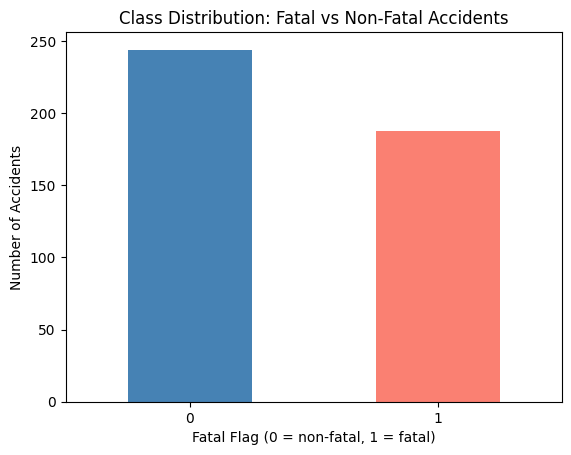

In [7]:
# Test for class imbalance
print("\nPercentages:")
print(data_df["fatal_flag"].value_counts(normalize=True) * 100)

# Bar chart
data_df["fatal_flag"].value_counts().plot(
    kind="bar",
    color=["steelblue", "salmon"]
)

plt.title("Class Distribution: Fatal vs Non-Fatal Accidents")
plt.xlabel("Fatal Flag (0 = non-fatal, 1 = fatal)")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=0)
plt.show()


### **Fatal and non-fatal accidents by weekday**

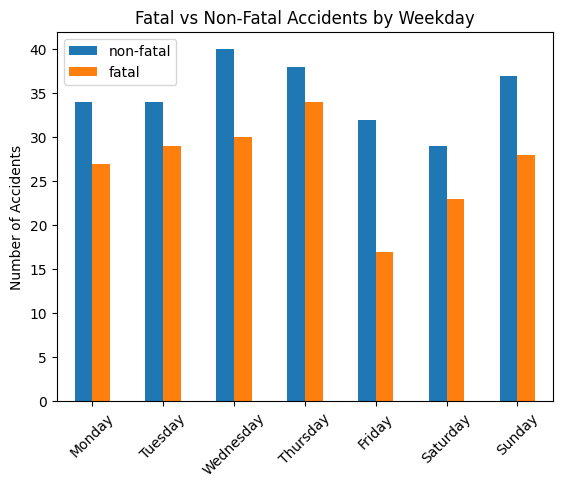

In [8]:
# Create table for weekdays for fata and non-fatal
weekday_counts = pd.DataFrame({
    "non-fatal": [
        data_df[(data_df["Monday"] == 1) & (data_df["fatal_flag"] == 0)].shape[0],
        data_df[(data_df["Tuesday"] == 1) & (data_df["fatal_flag"] == 0)].shape[0],
        data_df[(data_df["Wednesday"] == 1) & (data_df["fatal_flag"] == 0)].shape[0],
        data_df[(data_df["Thursday"] == 1) & (data_df["fatal_flag"] == 0)].shape[0],
        data_df[(data_df["Friday"] == 1) & (data_df["fatal_flag"] == 0)].shape[0],
        data_df[(data_df["Saturday"] == 1) & (data_df["fatal_flag"] == 0)].shape[0],
        data_df[(data_df["Sunday"] == 1) & (data_df["fatal_flag"] == 0)].shape[0],
    ],
    "fatal": [
        data_df[(data_df["Monday"] == 1) & (data_df["fatal_flag"] == 1)].shape[0],
        data_df[(data_df["Tuesday"] == 1) & (data_df["fatal_flag"] == 1)].shape[0],
        data_df[(data_df["Wednesday"] == 1) & (data_df["fatal_flag"] == 1)].shape[0],
        data_df[(data_df["Thursday"] == 1) & (data_df["fatal_flag"] == 1)].shape[0],
        data_df[(data_df["Friday"] == 1) & (data_df["fatal_flag"] == 1)].shape[0],
        data_df[(data_df["Saturday"] == 1) & (data_df["fatal_flag"] == 1)].shape[0],
        data_df[(data_df["Sunday"] == 1) & (data_df["fatal_flag"] == 1)].shape[0],
    ]
}, index=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

# Plot bar charts
weekday_counts.plot(kind="bar")
plt.title("Fatal vs Non-Fatal Accidents by Weekday")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()

### **PCA heatmap showing feature contributions to the first two principal components**

In [9]:
# Define features only
X = data_df.drop(columns=["fatal_flag"])

# Scale entire dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)

# Loadings for heatmap
loadings = pd.DataFrame(
    pca.components_,
    columns=X.columns,
    index=["PC1", "PC2"]
)

plt.figure(figsize=(10, 4))
sns.heatmap(loadings, cmap="coolwarm", center=0)
plt.title("PCA Heatmap")
plt.show()

NameError: name 'StandardScaler' is not defined

# Samuel Darmanin

In [14]:

path = "/content/drive/MyDrive/ICS5110 Project/Final Code & Report"
%cd {path}

/content/drive/.shortcut-targets-by-id/1sJzrnezmTgTbYziBXMG5L0IB2DFeCtZa/ICS5110 Project/Final Code & Report


In [15]:
df_cleaned_content = pd.read_csv("cleaned_data_using_content_v2.csv")

In [16]:
data_df = df_cleaned_content.copy()

In [17]:
# Filtering by accidents only

data_df = data_df[data_df["accident_flag"] != 0]

In [18]:
# Impute empty variables with median

data_df["time of incident"].fillna(data_df["time of incident"].median(),inplace=True)

data_df["weather_temperature_2m_mean"].fillna(data_df["weather_temperature_2m_mean"].median(),inplace=True)

data_df["weather_wind_speed_10m_max"].fillna(data_df["weather_wind_speed_10m_max"].median(),inplace=True)

data_df["weather_precipitation_sum"].fillna(data_df["weather_precipitation_sum"].median(),inplace=True)

data_df["weather_rain_sum"].fillna(data_df["weather_rain_sum"].median(),inplace=True)

data_df["weather_precipitation_hours"].fillna(data_df["weather_precipitation_hours"].median(),inplace=True)


# For the times, fill empty rows  with random values from the existing distribution
times = data_df["time of incident"].dropna()
data_df["time of incident"] = data_df["time of incident"].apply(
    lambda x: np.random.choice(times) if pd.isnull(x) else x
)


# Impute categorical variable with mode
most_frequent_weather = data_df["weather_type_category_code"].mode()[0]
print(f"Most frequent weather category: {most_frequent_weather}")

data_df["weather_type_category_code"].fillna(most_frequent_weather, inplace=True)

Most frequent weather category: 4.0


/tmp/ipython-input-2201038134.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_df["time of incident"].fillna(data_df["time of incident"].median(),inplace=True)
/tmp/ipython-input-2201038134.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col]

In [19]:
# Change date from string
data_df["date of incident"] = pd.to_datetime(data_df["date of incident"])

In [20]:
# Fill missing weekdaysd
# Fill missing weekdays - only updates NaN values

data_df["weekday of incident"] = data_df["weekday of incident"].fillna(data_df["date of incident"].dt.strftime("%A"))


In [21]:

# Create the weekend_flag column
# This returns True for Sat/Sun, then .astype(int) converts True to 1 and False to 0
data_df["weekend_flag"] = data_df["weekday of incident"].isin(["Saturday", "Sunday"]).astype(int)

#Investigating fatal & non fatal accidents


/tmp/ipython-input-2938711873.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Non-Fatal', 'Fatal'])


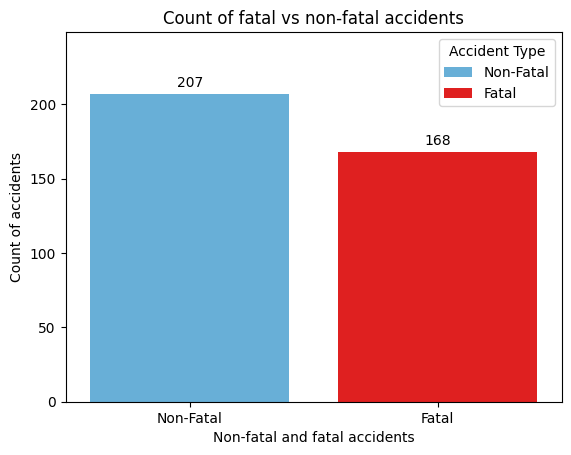

In [22]:
# Creating a barchart of fatal vs non-fatal accidents
plot_colours = {0: "#56B4E9", 1: "red"}
ax=sns.countplot(data=data_df, x="fatal_flag", palette=plot_colours, hue="fatal_flag")
plt.title("Count of fatal vs non-fatal accidents")
plt.xlabel("Non-fatal and fatal accidents")
plt.ylabel("Count of accidents")
plt.legend(title='Accident Type', labels=['Non-Fatal', 'Fatal'])
ax.set_xticklabels(['Non-Fatal', 'Fatal'])
ax.margins(y=0.2)

# Adding bar values
for i in ax.containers:
    ax.bar_label(i, fmt='%.0f', padding=3)

/tmp/ipython-input-1024595946.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Mon", "Tue","Wed","Thu", "Fri", "Sat", "Sun"])


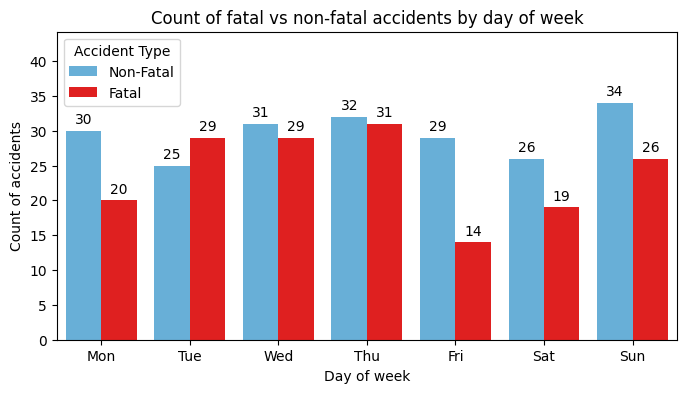

In [23]:
# Weekdays of incident
plt.figure(figsize=(8, 4))
plot_colours = {0: "#56B4E9", 1: "red"}
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
ax=sns.countplot(data=data_df, x="weekday of incident",palette = plot_colours,hue="fatal_flag", order=day_order )
sns.color_palette("viridis")
plt.title("Count of fatal vs non-fatal accidents by day of week")
plt.xlabel("Day of week")
plt.ylabel("Count of accidents")
plt.legend(title='Accident Type', labels=['Non-Fatal', 'Fatal'])
ax.set_xticklabels(["Mon", "Tue","Wed","Thu", "Fri", "Sat", "Sun"])
ax.margins(y=0.3)

# Adding bar values
for i in ax.containers:
    ax.bar_label(i, fmt='%.0f', padding=3)

/tmp/ipython-input-3389831506.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Weekday', 'Weekend'])


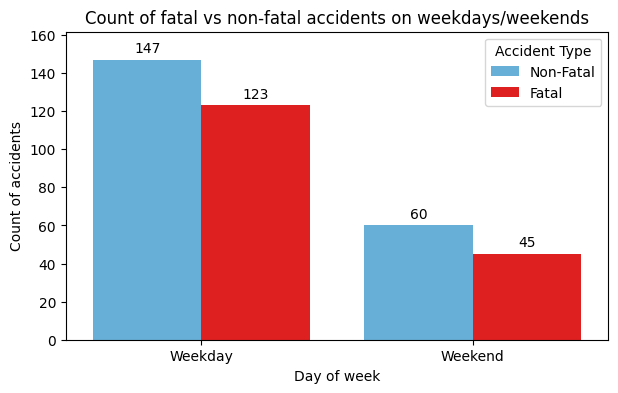

In [24]:
# Weekdays of incident
plt.figure(figsize=(7, 4))
ax=sns.countplot(data=data_df, x="weekend_flag",palette = plot_colours,hue="fatal_flag")
plt.title("Count of fatal vs non-fatal accidents on weekdays/weekends")
plt.xlabel("Day of week")
plt.ylabel("Count of accidents")
plt.legend(title='Accident Type', labels=['Non-Fatal', 'Fatal'])
ax.set_xticklabels(['Weekday', 'Weekend'])
ax.margins(y=0.1)

# Adding bar values
for i in ax.containers:
    ax.bar_label(i, fmt='%.0f', padding=3)

In [25]:
weekend_fatal_df = data_df.groupby(["weekend_flag", "fatal_flag"]).size().reset_index(name="count")
print(weekend_fatal_df)

   weekend_flag  fatal_flag  count
0             0           0    147
1             0           1    123
2             1           0     60
3             1           1     45


In [26]:
weekend_fatal_pct_df = (data_df.groupby('weekend_flag')['fatal_flag']
          .value_counts(normalize=True)
          .rename('percentage')
          .mul(100) # Convert to 0-100 range
          .reset_index())

In [27]:
weekend_fatal_pct_df.head()

,weekend_flag,fatal_flag,percentage
0,0,0,54.444444
1,0,1,45.555556
2,1,0,57.142857
3,1,1,42.857143


/tmp/ipython-input-4141969160.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Weekday', 'Weekend'])


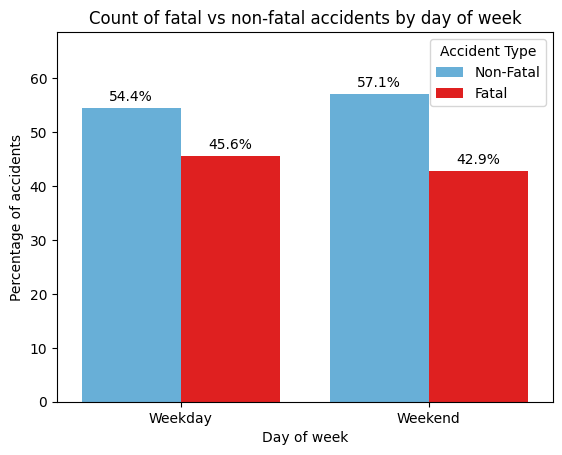

In [28]:
plot_colours_txt = {"Non-Fatal": "#56B4E9", "Fatal": "red"}
# Weekdays of incident
# 1. Update the data values first
weekend_fatal_pct_df['fatal_flag_name'] = weekend_fatal_pct_df['fatal_flag'].map({0: 'Non-Fatal', 1: 'Fatal'})

ax=sns.barplot(data=weekend_fatal_pct_df, x="weekend_flag",palette = plot_colours_txt,hue="fatal_flag_name", y ="percentage" )
plt.title("Count of fatal vs non-fatal accidents by day of week")
plt.xlabel("Day of week")
plt.ylabel("Percentage of accidents")
plt.legend(title='Accident Type')
ax.set_xticklabels(['Weekday', 'Weekend'])
ax.margins(y=0.2)

# Adding percentage values
for i in ax.containers:
    ax.bar_label(i, fmt='%.1f%%', padding=3)

In [29]:
    # Extract hour from time of incident

data_df["hour_of_incident"] = (data_df["time of incident"]//100).astype("Int64")


In [30]:
# Get number of fatalites and no. of accidents for each hour
fatality_by_hour = data_df.groupby("hour_of_incident").agg({"fatal_flag":["sum","count"]})
fatality_by_hour.columns = ["fatal_count", "accident_count"]

# If any hour has 0 accidents, fill with 0, so the time still shows on the plot
fatality_by_hour = fatality_by_hour.reindex(range(24), fill_value=0)

# Calculate fatality rate. Handles div by 0 by using fillna(0)
fatality_by_hour["fatality_rate"] = (fatality_by_hour["fatal_count"]/fatality_by_hour["accident_count"]).fillna(0).round(2)
fatality_by_hour = fatality_by_hour.reset_index()
fatality_by_hour["fatal_flag"] = data_df["fatal_flag"]

In [31]:
def get_risk_label(rate):
  if rate > 0.5: return "High"
  elif rate > 0.35: return "Medium"
  else: return "Low"


fatality_by_hour["risk_level"] = fatality_by_hour["fatality_rate"].apply(get_risk_label)


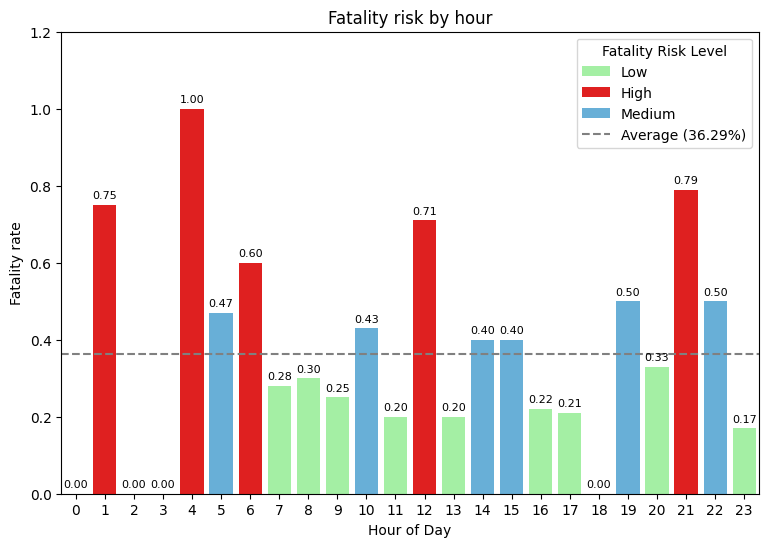

In [32]:
plt.figure(figsize=(9, 6))
ax = sns.barplot(data = fatality_by_hour, x = "hour_of_incident", y="fatality_rate", hue="risk_level", palette={"High": "red", "Medium": "#56B4E9", "Low": "#98FB98"})

plt.title("Fatality risk by hour")
plt.xlabel("Hour of Day")
plt.ylabel("Fatality rate")
ax.margins(y=0.2)
ax.axhline(y=fatality_by_hour["fatality_rate"].mean(),color="grey", linestyle="--",label=f'Average ({fatality_by_hour["fatality_rate"].mean():.2%})')
plt.legend(title="Fatality Risk Level")

# Adding percentage values
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f', padding=3, fontsize=8)


In [33]:
# Get number of fatalites and no. of accidents for each hour
fatality_by_hour = data_df.groupby("hour_of_incident").agg({"fatal_flag":["sum","count"]})
fatality_by_hour.columns = ["fatal_count", "accident_count"]

# If any hour has 0 accidents, fill with 0, so the time still shows on the plot
fatality_by_hour = fatality_by_hour.reindex(range(24), fill_value=0)

# Calculate fatality rate. Handles div by 0 by using fillna(0)
fatality_by_hour["fatality_rate"] = (fatality_by_hour["fatal_count"]/fatality_by_hour["accident_count"]).fillna(0).round(2)
fatality_by_hour = fatality_by_hour.reset_index()
fatality_by_hour["fatal_flag"] = data_df["fatal_flag"]

Text(0.5, 1.0, 'Fatality rate and accident count per hour')

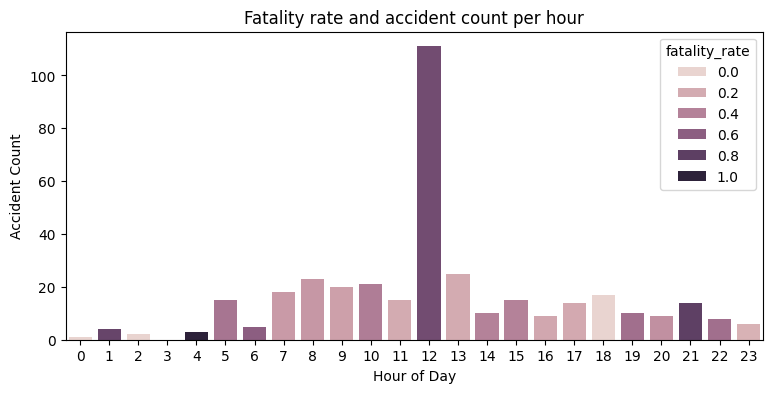

In [34]:
plt.figure(figsize=(9,4))
ax=sns.barplot(data=fatality_by_hour, x="hour_of_incident",y="accident_count", hue="fatality_rate")
plt.xlabel("Hour of Day")
plt.ylabel("Accident Count")
plt.title("Fatality rate and accident count per hour")

Text(0, 0.5, 'Fatality Rate')

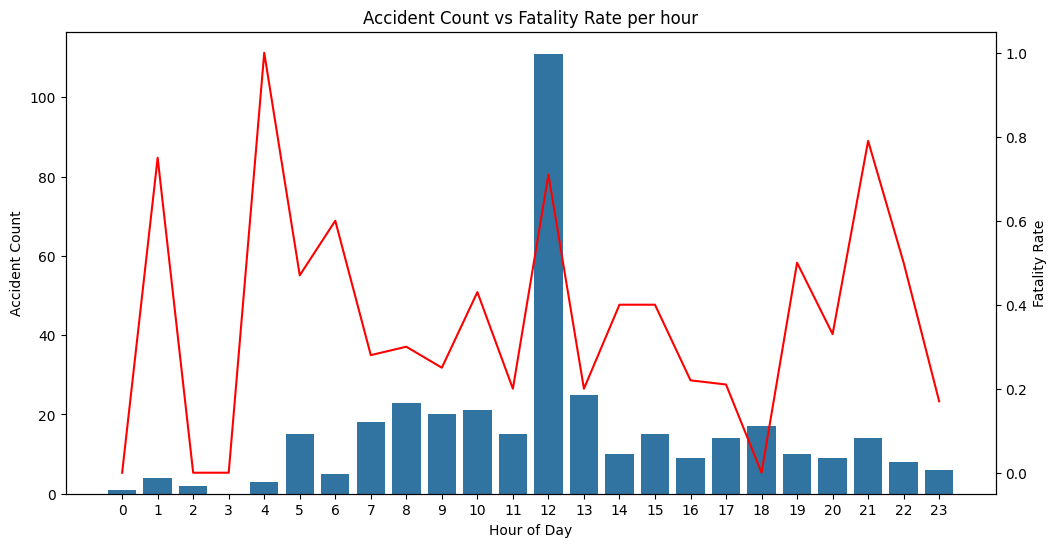

In [35]:
fig,ax = plt.subplots(figsize=(12,6))

sns.barplot(data=fatality_by_hour, x="hour_of_incident", y="accident_count", ax=ax)
ax.set_ylabel("Accident Count")
ax.set_xlabel("Hour of Day")
ax.set_title("Accident Count vs Fatality Rate per hour")

# Creating a secondary plot which shares the same x-axis
ax2=ax.twinx()
ax=sns.lineplot(data=fatality_by_hour, x="hour_of_incident", y="fatality_rate", color="red")
ax2.set_ylabel("Fatality Rate")

In [36]:
# Sorting time into categories

conditions = [
    (data_df["hour_of_incident"] >=6) & (data_df["hour_of_incident"] <=9), # Morning Rush hour
    (data_df["hour_of_incident"] >=10) & (data_df["hour_of_incident"] <=15), # Late-morning
    (data_df["hour_of_incident"] >=16) & (data_df["hour_of_incident"] <=19), # Evening Rush hour
    (data_df["hour_of_incident"] >=20) & (data_df["hour_of_incident"] <=22), # Evening
    (data_df["hour_of_incident"] >=23) | (data_df["hour_of_incident"] <=5) # Night
]
time_categories = ["Morning Rush", "Late-Morning","Evening Rush","Evening","Night"]

# Create new column
data_df["time_period"] = np.select(conditions,time_categories, default="Other")

In [37]:
weekend_fatal_pct_df['fatal_flag_name'] = weekend_fatal_pct_df['fatal_flag'].map({0: 'Non-Fatal', 1: 'Fatal'})

/tmp/ipython-input-1090786596.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Morning Rush\n 6-9", "Late-Morning\n 10-15", "Evening Rush\n 16-19", "Evening\n 20-22", "Night\n 23-5"])


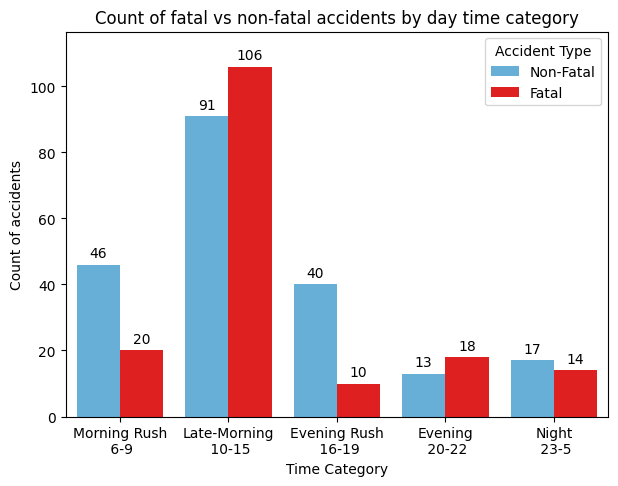

In [38]:
# Weekdays of incident
plt.figure(figsize=(7,5))
ax=sns.countplot(data=data_df, x="time_period",palette = plot_colours,hue="fatal_flag", order=time_categories)
plt.title("Count of fatal vs non-fatal accidents by day time category")
plt.xlabel("Time Category")
plt.ylabel("Count of accidents")
plt.legend(title='Accident Type', labels=['Non-Fatal', 'Fatal'])

ax.set_xticklabels(["Morning Rush\n 6-9", "Late-Morning\n 10-15", "Evening Rush\n 16-19", "Evening\n 20-22", "Night\n 23-5"])

ax.margins(y=0.1)

# Adding bar values
for i in ax.containers:
    ax.bar_label(i, fmt='%.0f', padding=3)